# Euler’s Method

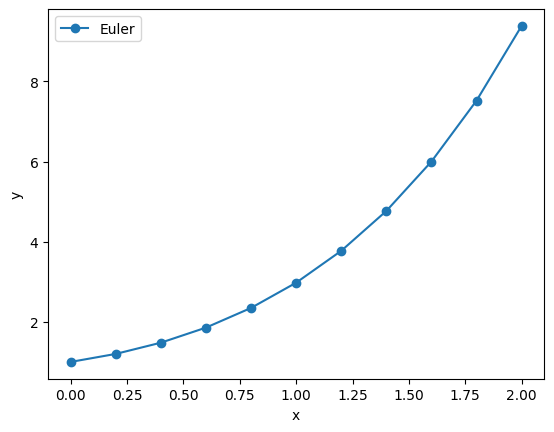

In [14]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x,y: x+y
x0, y0 = 0, 1
h, n = 0.2, 10
x = np.linspace(x0, x0+n*h, n+1)
y = np.zeros(n+1)
y[0] = y0

for i in range(n):
    y[i+1] = y[i] + h*f(x[i], y[i])

plt.plot(x,y,'o-', label="Euler")
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.show()


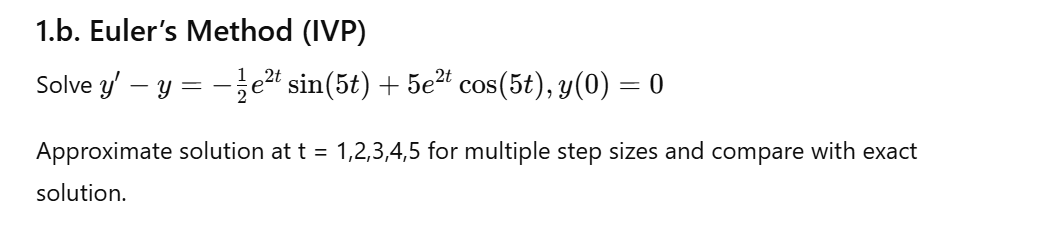

h=0.1, Approx at t=[1, 2, 3, 4, 5]: [ 0.00000000e+00 -1.92651858e+00 -2.82306110e+01  9.49002594e+02
  3.23870214e+06  1.17569578e+10]
h=0.05, Approx at t=[1, 2, 3, 4, 5]: [ 0.00000000e+00 -2.27828055e+00 -3.58757467e+01  4.42226536e+02
  3.87864673e+06  1.87885875e+10]
h=0.01, Approx at t=[1, 2, 3, 4, 5]: [ 0.00000000e+00 -2.57033243e+00 -4.25744493e+01 -8.42477730e+01
  4.41743858e+06  2.59392940e+10]
h=0.005, Approx at t=[1, 2, 3, 4, 5]: [ 0.00000000e+00 -2.60761074e+00 -4.34515130e+01 -1.58317049e+02
  4.48647355e+06  2.69377144e+10]
h=0.001, Approx at t=[1, 2, 3, 4, 5]: [ 0.00000000e+00 -2.63756637e+00 -4.41598339e+01 -2.18956569e+02
  4.54197887e+06  2.77539938e+10]


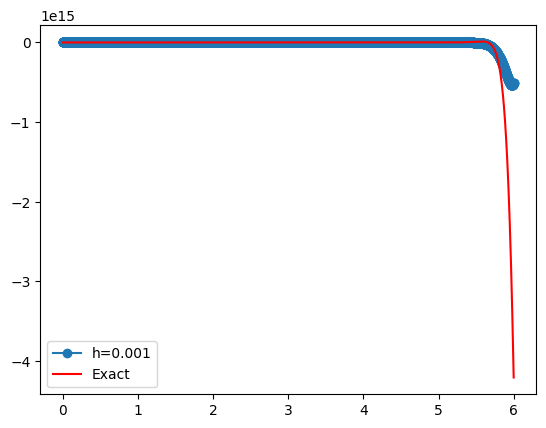

In [15]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda t,y: y - 0.5*t*np.exp(2*np.sin(5*t)) + 5*np.exp(t**2)*np.cos(5*t)
exact = lambda t: np.exp(t**2)*np.sin(5*t)  # example exact

h_list = [0.1,0.05,0.01,0.005,0.001]
t_end = [1,2,3,4,5]

for h in h_list:
    t = np.arange(0,6,h)
    y = np.zeros(len(t))
    for i in range(len(t)-1):
        y[i+1] = y[i] + h*f(t[i],y[i])
    print(f"h={h}, Approx at t={t_end}: {y[::int(t_end[0]/h)]}")

plt.plot(t,y,'o-',label=f"h={h}")
plt.plot(t, exact(t), 'r', label="Exact")
plt.legend(); plt.show()


# Picard Method

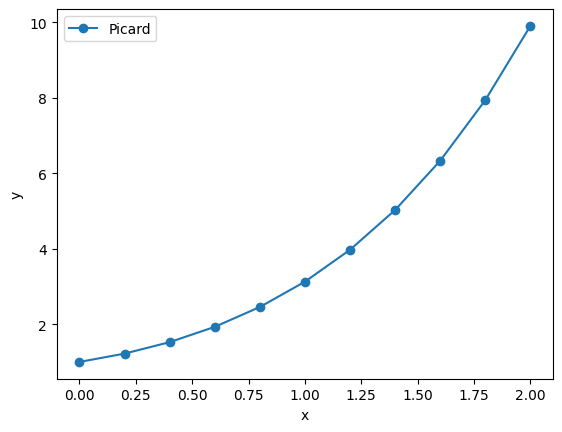

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,2,11)
y = np.zeros(len(x))

# Picard Iteration: y1 = y0 + ∫f(x, y0)dx
y[0] = 1
for i in range(1,len(x)):
    y[i] = y[0] + sum((x[1:i+1]-x[:i])*((x[1:i+1]+y[:i])+(x[:i]+y[:i]))/2)  # Trapezoid approx

plt.plot(x,y,'o-', label="Picard")
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.show()


# Milne’s Method

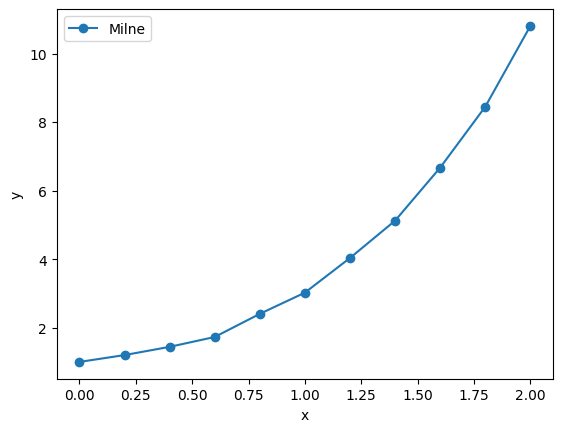

In [17]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x,y: x+y
x0, y0 = 0, 1
h = 0.2
n = 10
x = np.linspace(x0, x0+n*h, n+1)
y = np.zeros(n+1)
y[0:4] = [1, 1.2, 1.44, 1.728]  # initial values from Euler or exact

for i in range(3,n):
    # Predictor
    yp = y[i-3] + 4*h/3*(2*f(x[i-2],y[i-2]) - f(x[i-1],y[i-1]) + 2*f(x[i],y[i]))
    # Corrector
    y[i+1] = y[i-1] + h/3*(f(x[i-1],y[i-1]) + 4*f(x[i],y[i]) + f(x[i+1],yp))

plt.plot(x[:len(y)],y,'o-', label="Milne")
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.show()
